In [ ]:
%pip install jupyter -i https://pypi.tuna.tsinghua.edu.cn/simple
%pip install ipython  -i https://pypi.tuna.tsinghua.edu.cn/simple
%pip install ipykernel  -i https://pypi.tuna.tsinghua.edu.cn/simple

%pip install requests -i https://pypi.tuna.tsinghua.edu.cn/simple
%pip install bs4 -i https://pypi.tuna.tsinghua.edu.cn/simple
%pip install moviepy -i https://pypi.tuna.tsinghua.edu.cn/simple
%pip install seaborn -i https://pypi.tuna.tsinghua.edu.cn/simple
%pip install jieba -i https://pypi.tuna.tsinghua.edu.cn/simple
%pip install pylab -i https://pypi.tuna.tsinghua.edu.cn/simple
%pip install wordcloud -i https://pypi.tuna.tsinghua.edu.cn/simple
%pip install pandas -i https://pypi.tuna.tsinghua.edu.cn/simple
%pip install matplotlib -i https://pypi.tuna.tsinghua.edu.cn/simple
%pip install sklearn -i https://pypi.tuna.tsinghua.edu.cn/simple


In [2]:
# 基本文本数据获取
import requests
from bs4 import BeautifulSoup
import time
import random
import csv

def get_page_content(url):
    # 设置请求头，模拟浏览器访问，可根据实际情况更换合适的User-Agent等
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }

    # 这里以豆瓣电影Top250的页面为例，你可以替换为其他豆瓣页面URL
    url = url
    try:
        # 随机等待一段时间，模拟真实用户访问间隔
        # time.sleep(random.randint(1, 3))

        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            return response.text
        else:
            print(f"请求失败，状态码: {response.status_code}")
            return None
    except requests.RequestException:
        print(f"请求出现异常: {e}")
        return None

def get_data(html_content):
    if html_content:
        soup = BeautifulSoup(html_content, 'html.parser')
        list = soup.find(class_='grid_view').find_all('li')
        data_list= []
        for item in list:
            item_name = item.find(class_='title').string.strip()
            item_img = item.find('a').find('img').get('src')
            item_index = item.find(class_='').string.strip()
            item_score = item.find(class_='rating_num').string.strip()
            item_author = item.find('p').text.strip()
            item_intr = item.find(class_='inq').string.strip()
            data_list.append([item_index, item_name, item_img, item_score,item_author,item_intr])
            # print('爬取电影：' + item_index + ' | ' + item_name +' | ' + item_img +' | ' + item_score +' | ' + item_author +' | ' + item_intr )
        return data_list

def main(page=250):
    
    with open('doubai_rank.csv', 'w', encoding='utf-8', newline='') as csvfile:
        # writer = csv.writer(csvfile)
        # 写入表头
        # writer.writerow(['排名', '标题', '图片','得分', '作者', '简介'])
        for p in range(0,page):
            url = 'https://movie.douban.com/top250?start='+ str(p*25)+'&filter='
            html_content = get_page_content(url)
            data_list = get_data(html_content)
            for data in data_list:
                print(data)
                # 写入数据行
                

main(1)

['1', '肖申克的救赎', 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p480747492.jpg', '9.7', '导演: 弗兰克·德拉邦特 Frank Darabont\xa0\xa0\xa0主演: 蒂姆·罗宾斯 Tim Robbins /...\n                            1994\xa0/\xa0美国\xa0/\xa0犯罪 剧情', '希望让人自由。']
['2', '霸王别姬', 'https://img1.doubanio.com/view/photo/s_ratio_poster/public/p2561716440.jpg', '9.6', '导演: 陈凯歌 Kaige Chen\xa0\xa0\xa0主演: 张国荣 Leslie Cheung / 张丰毅 Fengyi Zha...\n                            1993\xa0/\xa0中国大陆 中国香港\xa0/\xa0剧情 爱情 同性', '风华绝代。']
['3', '阿甘正传', 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2372307693.jpg', '9.5', '导演: 罗伯特·泽米吉斯 Robert Zemeckis\xa0\xa0\xa0主演: 汤姆·汉克斯 Tom Hanks / ...\n                            1994\xa0/\xa0美国\xa0/\xa0剧情 爱情', '一部美国近现代史。']
['4', '泰坦尼克号', 'https://img9.doubanio.com/view/photo/s_ratio_poster/public/p457760035.jpg', '9.5', '导演: 詹姆斯·卡梅隆 James Cameron\xa0\xa0\xa0主演: 莱昂纳多·迪卡普里奥 Leonardo...\n                            1997\xa0/\xa0美国 墨西哥\xa0/\xa0剧情 爱情 灾难', '失去的才是永恒的。']
['5', '千与千寻', 'https:/

In [12]:
# 单个视频获取分析
import requests

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
    # referer告诉server我是从哪个页面跳转过来的，因此可以获取视频
    "referer":"https://www.bilibili.com/video/BV1QmChYWECm/?spm_id_from=333.1007.tianma.1-1-1.click&vd_source=39767bfbc4ae772d0c2f8d8b32b54ce6",
}
url1="https://upos-hz-mirrorakam.akamaized.net/upgcxcode/13/37/27792703713/27792703713-1-100022.m4s?e=ig8euxZM2rNcNbdlhoNvNC8BqJIzNbfqXBvEqxTEto8BTrNvN0GvT90W5JZMkX_YN0MvXg8gNEV4NC8xNEV4N03eN0B5tZlqNxTEto8BTrNvNeZVuJ10Kj_g2UB02J0mN0B5tZlqNCNEto8BTrNvNC7MTX502C8f2jmMQJ6mqF2fka1mqx6gqj0eN0B599M=&uipk=5&nbs=1&deadline=1736585471&gen=playurlv2&os=akam&oi=3113718423&trid=6ddf8ddc8b574ccbb89dfe54f7fb2bc3u&mid=1003166533&platform=pc&og=cos&upsig=f285454813cdf34705b4bf072c07072a&uparams=e,uipk,nbs,deadline,gen,os,oi,trid,mid,platform,og&hdnts=exp=1736585471~hmac=3f0c61271ddd6ff9ea5a6e8b057097380e125f18767f263aeb2131730ad1e4dc&bvc=vod&nettype=0&orderid=0,2&buvid=1744681E-BCD9-4110-F66E-A2FC865BB9BB08166infoc&build=0&f=u_0_0&agrr=1&bw=42916&logo=80000000" 
url2="https://upos-hz-mirrorakam.akamaized.net/upgcxcode/13/37/27792703713/27792703713-1-30232.m4s?e=ig8euxZM2rNcNbdlhoNvNC8BqJIzNbfqXBvEqxTEto8BTrNvN0GvT90W5JZMkX_YN0MvXg8gNEV4NC8xNEV4N03eN0B5tZlqNxTEto8BTrNvNeZVuJ10Kj_g2UB02J0mN0B5tZlqNCNEto8BTrNvNC7MTX502C8f2jmMQJ6mqF2fka1mqx6gqj0eN0B599M=&uipk=5&nbs=1&deadline=1736585471&gen=playurlv2&os=akam&oi=3113718423&trid=6ddf8ddc8b574ccbb89dfe54f7fb2bc3u&mid=1003166533&platform=pc&og=hw&upsig=2a494ee13d25403db0eb2084f7d4f842&uparams=e,uipk,nbs,deadline,gen,os,oi,trid,mid,platform,og&hdnts=exp=1736585471~hmac=c36cf0d6fc5e27c5ac50fe8440cdfaa8e5f9305c2eba76b8a5605ac840fc1730&bvc=vod&nettype=0&orderid=0,2&buvid=1744681E-BCD9-4110-F66E-A2FC865BB9BB08166infoc&build=0&f=u_0_0&agrr=1&bw=10469&logo=80000000"
res1 = requests.get(url1,headers=headers)
res2 = requests.get(url2,headers=headers)

#获取视频、 声音
with open("b站1.mp4",'wb') as f:
    f.write(res1.content)

with open("b站2.mp4",'wb') as f:
    f.write(res2.content)


In [13]:
# 对齐视频和音频
from moviepy import *
ad = AudioFileClip("b站2.mp4") # 注意区分哪个是音频、视频
vd = VideoFileClip("b站1.mp4")

# 将音频添加到视频

vd = vd.without_audio()  #删除声音，返回新的视频对象，原有对象不更改
vd.audio = ad

vd.write_videofile('b站视频合并版.mp4')

MoviePy - Building video b站视频合并版.mp4.
MoviePy - Writing audio in b站视频合并版TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
MoviePy - Writing video b站视频合并版.mp4



MoviePy - Done !
MoviePy - video ready b站视频合并版.mp4


In [ ]:

import requests

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
    # 身份认证
    "referer":"https://www.bilibili.com/video/BV1QmChYWECm/?spm_id_from=333.1007.tianma.1-1-1.click&vd_source=39767bfbc4ae772d0c2f8d8b32b54ce6",
}
url="https://www.bilibili.com/video/BV19S6qYvENu/?spm_id_from=333.1007.tianma.1-1-1.click&vd_source=39767bfbc4ae772d0c2f8d8b32b54ce6"
res = requests.get(url,headers=headers)
print(res.text)

In [ ]:
# 单页视频获取
# 1.找到包含所有视频链接的url
# 2.解析出响应的url
# 3.对这些url发送请求，获取单个视频页面响应内容
#4.提取对应音视频文件
# 合成音视频
#保存文件



In [6]:
#导入所需要的库
import requests
import json
import csv
#爬虫部分
#1.数据是动态加载的，所以需要寻找数据地址
def Get_data():
    #处理一个小小的反爬，伪装成浏览器发送请求。
    header={
        'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }
    url='https://api.bilibili.com/x/web-interface/popular'
    #从页面分析知道热门数据共有26页
    for i in range(1,26):
        #把URL的参数封装成一个字典
        param={
            'ps': 20,
            'pn': i
        }
        res=requests.get(url=url,headers=header,params=param)
        print(res.text)
        res.close()#关闭对网页的爬取
    return res.text

# Get_data()

In [7]:
#2.对爬取到的数据进行解析，获取每一条视频数据的标题，Up主，播放量，评论数

#对所有视频的数据都解析，每一条数据以元组的形式保存在列表中
all_data=[]
def Parse(text):
    dict=json.loads(text)#把数据转化为字典方便数据提取
   # print(dict['data']['list'])

    for i in dict['data']['list']:
        # print(i['title'])#标题
        # print(i['owner']['name'])#up主
        # print(i['stat']['view'])#播放量
        # print(i['stat']['danmaku'])#评论数

        temp=(i['title'],i['owner']['name'],i['stat']['view'],i['stat']['danmaku'])
        all_data.append(temp)

#3.对数据进行保存
def Save_data(all_data):
    with open(r'all_data.csv',mode='w',encoding='utf-8') as fp:
        writer=csv.writer(fp)#创建一个csv的写对象
        writer.writerow(['视频名称','up主','播放量','评论数'])#写一行数据作为数据头部
        for i in all_data:
            writer.writerow(i)#把all_data的数据写进去


if __name__ == '__main__':
    Parse(Get_data())
    #print(all_data)
    Save_data(all_data=all_data)

{"code":0,"message":"0","ttl":1,"data":{"list":[{"aid":113799067668843,"videos":1,"tid":201,"tname":"科学科普","copyright":1,"pic":"http://i2.hdslb.com/bfs/archive/78b7a4e876cb75ec8cb4244f99c542fd96b3117a.jpg","title":"【毕导】世界上最强的酸，比纯硫酸强一亿亿倍？","pubdate":1736481600,"ctime":1736436123,"desc":"千万千万千万千万千万千万千万不要模仿！！！！\n\n你还可以看看： \n你有一种连你自己都没意识到的超能力 BV12hz2Y1E3B\n计算机科学之父的业余爱好是什么？BV1QMmZYzET2 \n这是科学史上最难理解的悖论 BV1SDSiYEEL8\n看了这个视频，你会释怀你倒霉的一生 BV1PE421w7jL \n打个赌，你从没拉出过这种形状的便便 BV144421D7dE \n打个赌，你说不出第二种蓝色的水果！BV1mT421Y7mE \n右手是你生活在三维空间的铁证 BV1sw4m1D79p \n这个视频里说的都是真","state":0,"duration":721,"rights":{"bp":0,"elec":0,"download":0,"movie":0,"pay":0,"hd5":1,"no_reprint":1,"autoplay":1,"ugc_pay":0,"is_cooperation":0,"ugc_pay_preview":0,"no_background":0,"arc_pay":0,"pay_free_watch":0},"owner":{"mid":254463269,"name":"毕导","face":"https://i2.hdslb.com/bfs/face/a59d6b2dff6faa47bc07877b76f3194c598f5649.jpg"},"stat":{"aid":113799067668843,"view":2762654,"danmaku":12339,"reply":4361,"favorite":52174,"coin":35344,"

C:\Users\86185\AppData\Local\Temp\ipykernel_23972\2741554106.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['评论数'].values,hist=True, kde=True,axlabel='tip',rug=False,fit=None,hist_kws = {'color':'b','label':'评论数'}, kde_kws={'color':'b'})


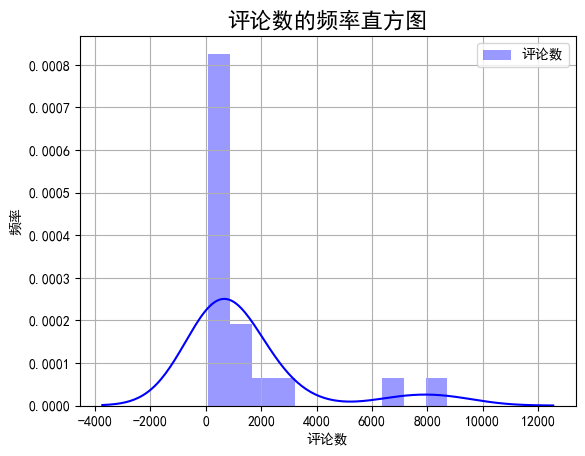

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#评论数的频率直方图
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
df=pd.read_csv('all_data.csv')
plt.figure

sns.distplot(df['评论数'].values,hist=True, kde=True,axlabel='tip',rug=False,fit=None,hist_kws = {'color':'b','label':'评论数'}, kde_kws={'color':'b'})
plt.title("评论数的频率直方图",fontsize=16)
plt.legend()
plt.xlabel('评论数')
plt.ylabel('频率')
plt.grid()



C:\Users\86185\AppData\Local\Temp\ipykernel_23972\932226313.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['播放量'].values,hist=True, kde=True,axlabel='tip',rug=False,fit=None,hist_kws = {'color':'b','label':'播放量'}, kde_kws={'color':'b'})


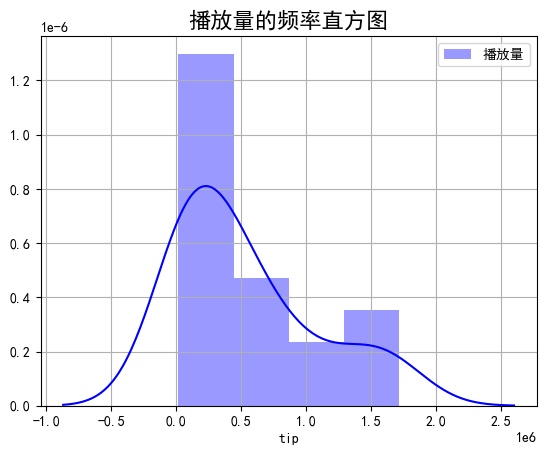

In [10]:
#播放量的频率直方图
sns.distplot(df['播放量'].values,hist=True, kde=True,axlabel='tip',rug=False,fit=None,hist_kws = {'color':'b','label':'播放量'}, kde_kws={'color':'b'})
plt.title("播放量的频率直方图",fontsize=16)
plt.legend()
plt.ylabel('')
plt.grid()

[1345510  204859 4593869  507073  371801 2552019 1118200  298358 1169433
  759241  425337 2309167  309027  728539 1322334 1211243   72362  288381
 1144522  194658 1547289 2553844 1093369  351257  520735  130704  249703
 1320883  643857 2708849  582471  371224 6607024  919379  562558]
['崩坏星穹铁道' '亿点点不一样' '春晚' '哔哩哔哩纪录片' '原神' '盗月社食遇记' '棋手战鹰' '毕导' '尴尬的铁根er'
 '哔哩哔哩番剧' '大森子哈哈哈' '文武俩兄弟' '潜艇伟伟迷' '中国BOY超级大猩猩' '腾讯游戏' '橙飞一下' 'VIVINOS'
 '毒影子' '波士顿圆脸' '星穹餐车茶话会' '原神' '哔哩哔哩弹幕网' '穿毛裤的小拉泽' '纳尔教主' '肥鸡煲' '逍遥散人'
 '右撇子猛孩' '中国日报双语新闻' '幕川北' '好奇万花筒' '世界见闻录' '杰威尔音乐' '小潮院长' '干饭三健客' '央视新闻']


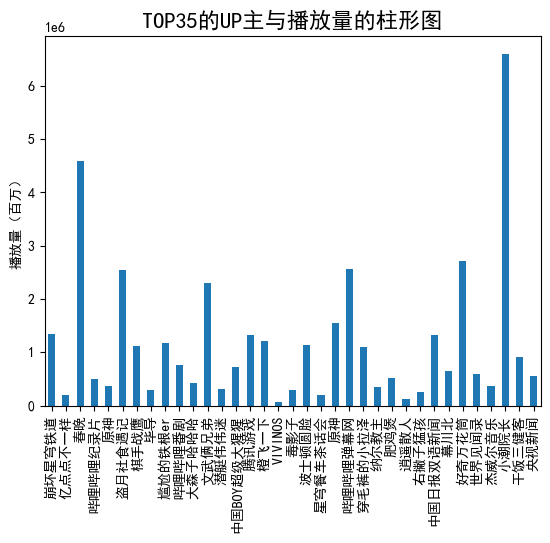

In [12]:
#TOP35的UP主与播放量的柱形图
data=np.array(df['播放量'][0:35])
index=np.array(df['up主'][0:35])
print(data)
print(index)
plt.ylabel('播放量（百万）')

plt.title("TOP35的UP主与播放量的柱形图",fontsize=16)
s = pd.Series(data, index)

s.plot(kind='bar')
plt.savefig('TOP35的UP主与播放量的柱形图.jpg')


[ 6032  2180 40143  1848  1094  2824  1215  2953  1270 36511   397 19018
   586  4461  1276  5232   448   322 11472   159 15454  2498  3102   259
   503  1304   385   252   770    80  3622  1776 96667   981  1760]
['崩坏星穹铁道' '亿点点不一样' '春晚' '哔哩哔哩纪录片' '原神' '盗月社食遇记' '棋手战鹰' '毕导' '尴尬的铁根er'
 '哔哩哔哩番剧' '大森子哈哈哈' '文武俩兄弟' '潜艇伟伟迷' '中国BOY超级大猩猩' '腾讯游戏' '橙飞一下' 'VIVINOS'
 '毒影子' '波士顿圆脸' '星穹餐车茶话会' '原神' '哔哩哔哩弹幕网' '穿毛裤的小拉泽' '纳尔教主' '肥鸡煲' '逍遥散人'
 '右撇子猛孩' '中国日报双语新闻' '幕川北' '好奇万花筒' '世界见闻录' '杰威尔音乐' '小潮院长' '干饭三健客' '央视新闻']


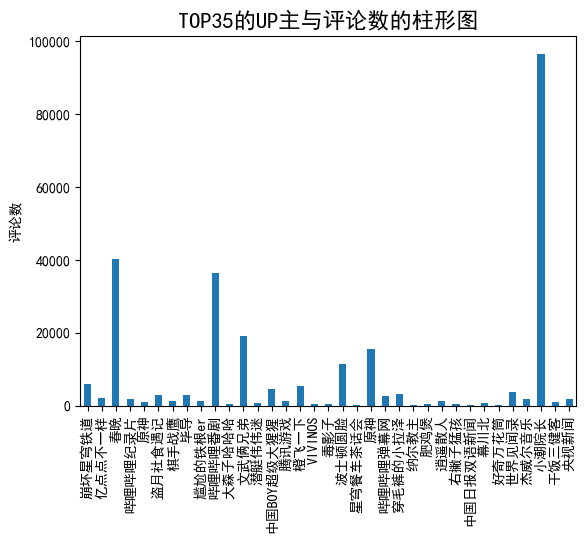

In [13]:

#TOP35的UP主与评论数的柱形图
data=np.array(df['评论数'][0:35])
index=np.array(df['up主'][0:35])
print(data)
print(index)
plt.ylabel('评论数')

s = pd.Series(data, index)

plt.title("TOP35的UP主与评论数的柱形图",fontsize=16)

s.plot(kind='bar')

#数据持久化
plt.savefig('TOP35UP主与评论数的柱形图.jpg')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\86185\AppData\Local\Temp\jieba.cache
Loading model cost 0.603 seconds.
Prefix dict has been built successfully.


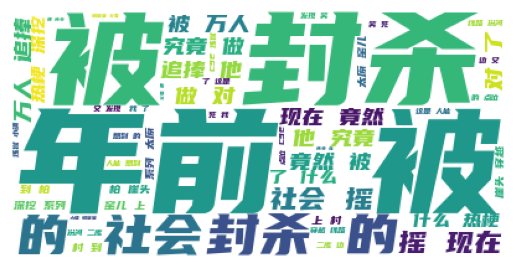

In [11]:
import jieba
from pylab import *
from wordcloud import WordCloud
text = '  '
a=''
df=pd.read_csv('all_data.csv')
for line in df['视频名称']:
    a+= line
    text+=a
# 使用jieba模块将字符串分割为单词列表
cut_text = '    '.join(jieba.cut(text))
cloud = WordCloud(
    background_color = 'white',
    # 对中文操作必须指明字体
    font_path='优设标题黑.ttf',
    max_words = 50,
    max_font_size = 200
    ).generate(cut_text)

# 保存词云图片
cloud.to_file('ciwordcloud.jpg')
plt.imshow(cloud)
plt.axis('off')
plt.show()